In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

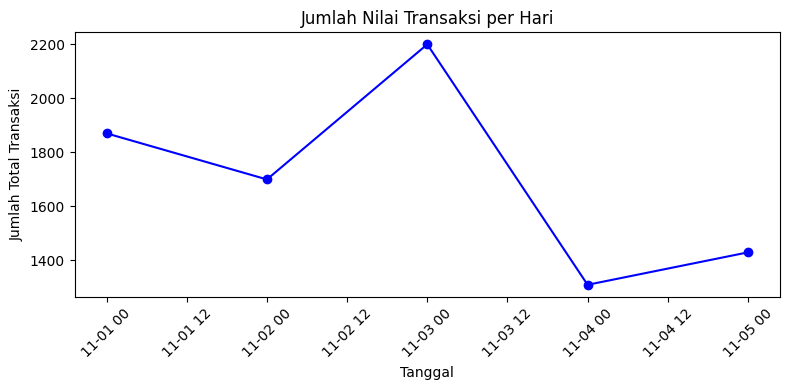

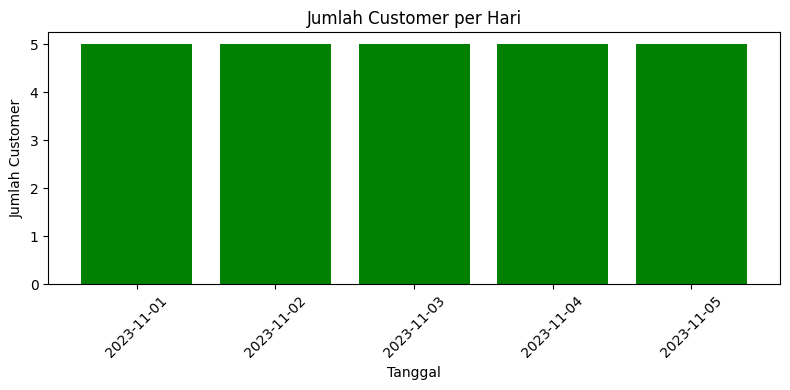

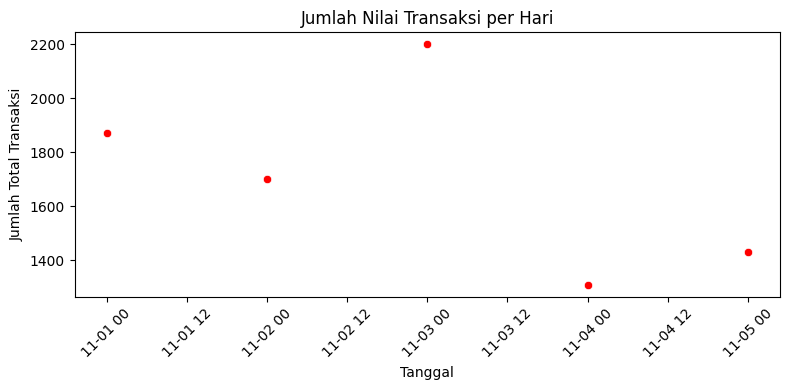

In [6]:
#prioritas 1 no 1
df = pd.read_csv('electronic_shop.csv')

df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

daily_summary = df.groupby(df['transaction_date'].dt.date).agg({
    'transaction_amount': 'sum',
    'customer_name': 'nunique'
}).reset_index()

daily_summary.columns = ['transaction_date', 'total_transaction_amount', 'num_customers']

#line plot untuk menggambarkan jumlah nilai dari transaksi per hari
plt.figure(figsize=(8, 4))
plt.plot(daily_summary['transaction_date'], daily_summary['total_transaction_amount'], marker='o', linestyle='-', color='b')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot untuk menggambarkan jumlah customer per hari
plt.figure(figsize=(8, 4))
plt.bar(daily_summary['transaction_date'], daily_summary['num_customers'], color='g')
plt.title('Jumlah Customer per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#scatter plot untuk menggambarkan jumlah nilai dari transaksi per hari
plt.figure(figsize=(8, 4))
sns.scatterplot(x=daily_summary['transaction_date'], y=daily_summary['total_transaction_amount'], color='r')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


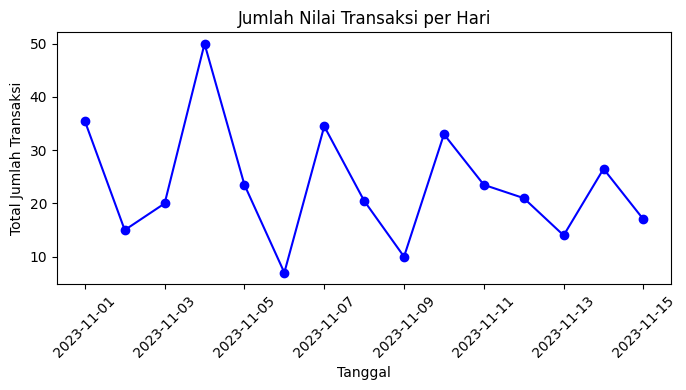

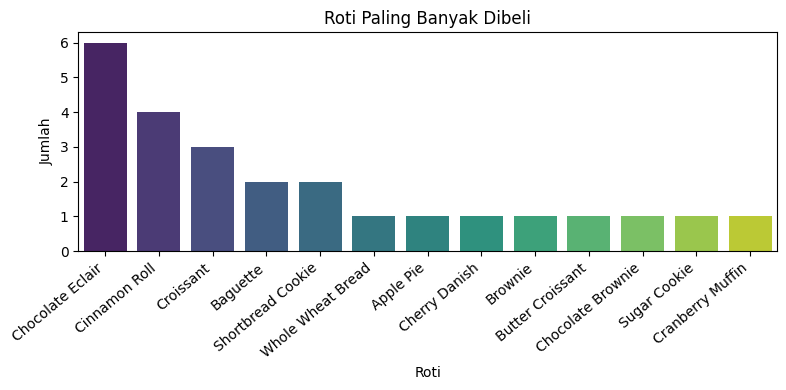

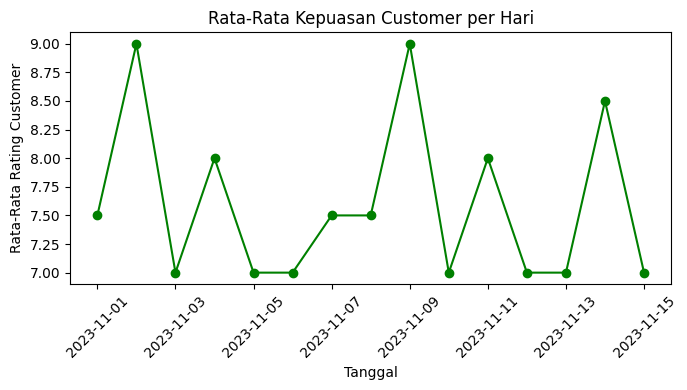

In [18]:
#prioritas 1 no 2
df = pd.read_csv('bakery.csv')

df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

#jumlah nilai transaksi per hari
daily_transactions = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum().reset_index()
daily_transactions.columns = ['transaction_date', 'total_transaction_amount']

#jenis roti yang paling banyak dipesan
most_ordered_bread = df['item_name'].value_counts().idxmax()

#rata-rata kepuasan pelanggan per hari
daily_customer_rating = df.groupby(df['transaction_date'].dt.date)['customer_rating'].mean().reset_index()
daily_customer_rating.columns = ['transaction_date', 'average_customer_rating']

#line plot untuk jumlah nilai transaksi per hari
plt.figure(figsize=(7, 4))
plt.plot(daily_transactions['transaction_date'], daily_transactions['total_transaction_amount'], marker='o', linestyle='-', color='b')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot untuk jenis roti yang paling banyak dipesan
bread_counts = df['item_name'].value_counts().reset_index()
bread_counts.columns = ['item_name', 'counts']
plt.figure(figsize=(8, 4))
sns.barplot(x='item_name', y='counts', data=bread_counts, palette='viridis', hue='item_name', dodge=False, legend=False)
plt.title('Roti Paling Banyak Dibeli')
plt.xlabel('Roti')
plt.ylabel('Jumlah')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

#line plot untuk rata-rata kepuasan pelanggan per hari
plt.figure(figsize=(7, 4))
plt.plot(daily_customer_rating['transaction_date'], daily_customer_rating['average_customer_rating'], marker='o', linestyle='-', color='g')
plt.title('Rata-Rata Kepuasan Customer per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Rating Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()